# Задание
## Требования к заданию:

1. Выберите область применения для системы анализа данных
* Определите ключевые параметры и характеристики данных, которые будут анализироваться в выбранной области.

2. Сбор и подготовка данных:
* Загрузите данные из CSV файла.
* Проведите предварительный анализ данных, выявите и устраните пропущенные значения, дубликаты и другие возможные проблемы в данных.

3. Анализ данных:
* Проведите исследовательский анализ данных с использованием библиотек Python, таких, как Pandas и NumPy.
Рассчитать среднее, медиану, моду, стандартное отклонение, минимальное и максимальное значение для каждого числового признака в датасете.
* Определить количество уникальных значений для категориальных признаков.
* Рассчитать корреляционную матрицу для числовых признаков. Интерпретировать полученные значения, выявить наиболее коррелирующие признаки.
* Выполнить группировку данных по одному или нескольким категориальным признакам и рассчитать агрегированные статистики (среднее, сумма, количество и т.д.) для числовых признаков.
* Проанализировать полученные результаты, выявить зависимости и тренды.

4. Визуализация данных:
* Создание графиков для представления распределений признаков с использованием библиотеки matplotlib.
* Построить гистограммы и ящики с усами для числовых признаков, чтобы оценить распределение данных.
* Построить столбчатые диаграммы для категориальных признаков.
* Визуализировать корреляционную матрицу с помощью тепловой карты.
* Построить точечные диаграммы для пар числовых признаков, чтобы оценить взаимосвязи между ними.
* Создать парные графики для выявления взаимосвязей между несколькими признаками.
* Построить графики временных рядов для анализа трендов и сезонности (*если в данных присутствует временная компонента).

## Подготовьте отчет:

Подготовьте отчет, включающий обзор выбранной области, описание анализа и визуализации данных, а также код программы + подробное описание графиков (назначение и смысл в выбранной области)


In [160]:
# # Библиотеки для работы с данными
import pandas as pd
import numpy as np

# Визуализация
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.io import templates
from sklearn.preprocessing import LabelEncoder

templates.default = "plotly_white"
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,5)

# Введение

В данном отчете представлен анализ датасета, содержащего информацию о продажах видеоигр с объемом продаж свыше 100,000 копий по всему миру. Эти данные были собраны с сайта vgchartz.com и содержат информацию о названии игр, платформах, на которых они выпускались, годе выпуска, жанре, издателе, а также региональных и глобальных продажах. Анализ этих данных позволит исследовать тренды и предпочтения в индустрии видеоигр, а также оценить влияние различных факторов на коммерческий успех игр.

## Ключевые параметры и характеристики

С целью предоставления объективной аналитики в сфере разработки и выпуска видеоигр, а также содействия в улучшении качества игрового контента, было принято решение о выборе датасета, содержащего статистическую информацию о продажах видеоигр. В ходе данного проекта осуществляется анализ параметров, влияющих на успешность и приемлемость видеоигровых продуктов для потребителей. Целью данного исследования является не только выявление тенденций и факторов, влияющих на успех или неудачу игровых проектов, но и предоставление рекомендаций как крупным, так и независимым разработчикам с целью повышения качества создаваемого контента и удовлетворения запросов аудитории. Руководствуясь данными и выводами данного исследования, разработчики смогут принимать обоснованные решения в процессе создания и продвижения видеоигр, что, в конечном итоге, способствует развитию индустрии и улучшению опыта игроков.

С каждым годом рынок видеоигр продолжает расширяться, вызывая соответствующий рост ожиданий у геймеров. AAA-релизы становятся центром внимания, ожидая от разработчиков инноваций и революционных изменений. Аналитические отделы таких компаний, как Activision, Bethesda Softworks, Square Enix и другие, активно исследуют рынок видеоигр, учитывая различные метрики, такие как выручка от продаж, активная аудитория, доход с одного игрока и показатели возврата инвестиций. Важно отметить, что аналитические отчеты разрабатываются не просто как документация, а как инструмент, помогающий принимать решения маркетологам, продюсерам и геймдизайнерам.

К сожалению, некоторые крупные игровые компании, стремясь к максимизации прибыли, иногда теряют понимание сути геймдева. Это приводит к таким неудачным релизам, как "GTA: The Trilogy — The Definitive Edition", который в 2021 году стал объектом острого критицизма. Этот ремастер классической трёхмерной трилогии GTA стал известен своим низким качеством, включая баги, цензуру, низкую производительность, удаленные механики и ужасную графику. "Cyberpunk 2077" - еще один пример провального релиза, где амбиции разработчиков и маркетинговых стратегов столкнулись с реальностью. Несмотря на высокие ожидания и безупречную репутацию студии CD Project RED, игра столкнулась с критикой из-за массовых технических проблем и разочаровавшей игровой механики. В погоне за прибылью руководители игровых студий часто забывают о том, что именно делает игру незабываемой. Это базовые принципы геймдева, которые создают игры, становящиеся частью культуры.

| Параметр                  | Описание                                                                       |
|---------------------------|--------------------------------------------------------------------------------|
|Rank|	Ранг по общим продажам|
|Name|	Название игры|
|Platform|	Платформа выпуска игры|
|Year|	Год выпуска игры|
|Genre|	Жанр игры|
|Publisher|	Издатель|
|NA_Sales|	Продажи в Северной Америке (млн копий)|
|EU_Sales|	Продажи в Европе (млн копий)|
|JP_Sales|	Продажи в Японии (млн копий)|
|Other_Sales|	Продажи в других регионах мира (млн копий)|
|Global_Sales|	Общемировые продажи (млн копий)|

## Загрузка набора данных

Данные были загружены из файла CSV для дальнейшего анализа. В рамках подготовки данных проведена очистка от пропущенных значений, дубликатов и других аномалий. Также была выполнена предобработка данных, включая кодирование категориальных признаков и нормализацию числовых данных, для обеспечения их совместимости с алгоритмами машинного обучения.

In [161]:
df = pd.read_csv('vgsales.csv')
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [162]:
# Удаление пропусков
df.dropna(inplace=True)

# Преобразование столбцов к категориальным типам
categorical_columns = [
    'Platform', 'Genre', 'Publisher',
]
for column in categorical_columns:
    df[column] = df[column].astype('category')

df['Year'] = df['Year'].astype(int)
df

Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16291 rows x 11 columns]

## Предварительный анализ данных

Как видим, данные полные, пропусков нет, поэтому нет необходимости заполнять пропуски.
Далее проверим данные на выбросы. Для начала сравним минимальное и максимальное значение со средним (для численных признаков):

In [163]:
info = pd.DataFrame()
info.index = df.columns
info['Тип данных'] = df.dtypes
info['Количество уникальных'] = df.nunique()
info['Количество пропусков'] = df.isna().sum()
info['Количество значений'] = df.count()
info


Тип данных  Количество уникальных  Количество пропусков  \
Rank              int64                  16291                     0   
Name             object                  11325                     0   
Platform       category                     31                     0   
Year              int32                     39                     0   
Genre          category                     12                     0   
Publisher      category                    576                     0   
NA_Sales        float64                    408                     0   
EU_Sales        float64                    305                     0   
JP_Sales        float64                    244                     0   
Other_Sales     float64                    157                     0   
Global_Sales    float64                    621                     0   

              Количество значений  
Rank                        16291  
Name                        16291  
Platform                    16291  
Year                        16291  
Genre                       16291  
Publisher                   16291  
NA_Sales                    16291  
EU_Sales                    16291  
JP_Sales                    16291  
Other_Sales                 16291  
Global_Sales                16291

# Анализ данных

## Рассчитаем основные статистики для числовых признаков

In [164]:
print("Основные статистики для числовых признаков:")
df.describe()

Основные статистики для числовых признаков:


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

Выводы по статистикам:
* Продажи сильно варьируются, с низким средним и высоким стандартным отклонением, указывающим на большие выбросы в данных (например, крайне успешные игры).
* Медианное значение значительно ниже среднего, что подтверждает наличие скошенности распределений в сторону низких значений с несколькими очень высокими.

## Рассчитаем количество уникальных значений для категориальных признаков

In [165]:
print("Количество уникальных значений для категориальных признаков:")
df.describe(include='category').T

Количество уникальных значений для категориальных признаков:


count unique              top  freq
Platform   16291     31               DS  2131
Genre      16291     12           Action  3251
Publisher  16291    576  Electronic Arts  1339

Количество уникальных значений для категориальных признаков показывает разнообразие платформ, годов выпуска, жанров и издателей:
* Platform: 31 уникальная платформа, наиболее популярная - DS (2163 упоминания).
* Year: 39 уникальных годов, наибольшее количество игр выпущено в 2009 году (1431 игра).
* Genre: 12 уникальных жанров, наиболее распространенный - Action (3316 игр).
* Publisher: 578 различных издателей, наиболее часто встречается Electronic Arts (1351 игра).

## Рассчитаем корреляционную матрицу для числовых признаков

Матрица корреляции позволяет определить связи между признаками. Значения в матрице колеблются от -1 до 1, где:

- 1 означает положительную линейную корреляцию,
- -1 означает отрицательную линейную корреляцию,
- 0 означает отсутствие линейной корреляции.

Матрица корреляции показывает степень линейной зависимости между различными продажами по регионам и общемировыми продажами, а также их связь с рангом игры. Ниже приведены ключевые выводы из анализа корреляции:

* Rank и продажи: Отрицательные значения корреляции между рангом и продажами во всех регионах (NA_Sales, EU_Sales, JP_Sales, Other_Sales и Global_Sales) указывают на то, что игры с более высокими продажами имеют более низкий ранг (ближе к первому месту). Коэффициент корреляции варьируется от -0.43 для глобальных продаж до -0.27 для продаж в Японии, что говорит о наибольшем влиянии глобальных продаж на ранг.
* Между региональными продажами: Корреляция между продажами в различных регионах (NA_Sales, EU_Sales, JP_Sales, Other_Sales) и глобальными продажами (Global_Sales) очень высока, особенно между NA_Sales и Global_Sales (0.94), что подчеркивает, что продажи в Северной Америке являются сильным индикатором глобального успеха игры. Схоже высокая корреляция между EU_Sales и Global_Sales (0.90).
* Региональные взаимосвязи: Корреляция между продажами в Северной Америке (NA_Sales) и Европе (EU_Sales) также высока (0.77), указывая на похожие предпочтения или тенденции в этих регионах. Корреляция между JP_Sales и другими регионами заметно ниже, что может свидетельствовать о различиях в рыночных предпочтениях или культурных особенностях.
* Зависимость других продаж: Other_Sales также демонстрируют высокую корреляцию с EU_Sales (0.73) и Global_Sales (0.75), подчеркивая их вклад в общемировые продажи.

In [166]:
# Корреляционная матрица
num_columns = df.select_dtypes(exclude=['category', 'object']).columns

corr = df[num_columns].corr().round(2)

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='ice'
)

fig.update_layout(title='Матрица корреляции', height=900, width=900)
fig.show()


## Выполним группировку данных по одному или нескольким категориальным признакам

Данные были сгруппированы по жанру (Genre), что позволило агрегировать статистику продаж по различным регионам (Северная Америка, Европа, Япония, другие регионы) и в масштабе всего мира. Для каждого жанра были рассчитаны средние значения (mean) и суммарные значения (sum) продаж. Это дает представление о популярности и коммерческом успехе различных жанров игр в разных регионах.

Краткие выводы:
* Жанры с наибольшими продажами: Игры жанра Action и Shooter показывают высокие средние и суммарные продажи во всех регионах, что отражает их глобальную популярность.
* Региональные предпочтения: Role-Playing игры особенно популярны в Японии, что подтверждается значительно высшими средними и суммарными продажами в этом регионе по сравнению с другими.
* Платформеры и головоломки: Несмотря на меньшие глобальные продажи, жанры Platform и Puzzle демонстрируют высокие средние продажи, особенно в Северной Америке и Японии.

In [167]:
grouped_data = df.groupby('Genre').agg({
    'NA_Sales': ['mean', 'sum'],
    'EU_Sales': ['mean', 'sum'],
    'JP_Sales': ['mean', 'sum'],
    'Other_Sales': ['mean', 'sum'],
    'Global_Sales': ['mean', 'sum']
})
grouped_data.round(3)

NA_Sales         EU_Sales         JP_Sales         Other_Sales  \
                 mean     sum     mean     sum     mean     sum        mean   
Genre                                                                         
Action          0.265  861.77    0.159  516.48    0.049  158.65       0.057   
Adventure       0.080  101.93    0.050   63.74    0.041   51.99       0.013   
Fighting        0.264  220.74    0.120  100.00    0.104   87.15       0.043   
Misc            0.235  396.92    0.126  211.77    0.063  106.67       0.044   
Platform        0.510  445.99    0.229  200.65    0.149  130.65       0.059   
Puzzle          0.214  122.01    0.089   50.52    0.099   56.68       0.022   
Racing          0.291  356.93    0.193  236.31    0.046   56.61       0.063   
Role-Playing    0.222  326.50    0.128  187.57    0.238  350.29       0.040   
Shooter         0.449  575.16    0.242  310.45    0.030   38.18       0.079   
Simulation      0.214  181.78    0.133  113.02    0.075   63.54       0.037   
Sports          0.291  670.09    0.161  371.34    0.058  134.76       0.058   
Strategy        0.101   67.83    0.067   44.84    0.073   49.10       0.017   

                     Global_Sales           
                 sum         mean      sum  
Genre                                       
Action        184.92        0.530  1722.84  
Adventure      16.70        0.184   234.59  
Fighting       36.19        0.531   444.05  
Misc           73.92        0.468   789.87  
Platform       51.51        0.948   829.13  
Puzzle         12.47        0.425   242.21  
Racing         76.68        0.593   726.76  
Role-Playing   59.38        0.628   923.83  
Shooter       101.90        0.800  1026.20  
Simulation     31.36        0.460   389.98  
Sports        132.65        0.568  1309.24  
Strategy       11.23        0.259   173.27

# Визуализация данных
## Гистограммы и ящики с усами

Гистограмма — это вид диаграммы, представляющий распределение числовых данных. Она помогает оценить плотность вероятности распределения данных. Гистограммы идеально подходят для иллюстрации распределений признаков, таких как возраст клиентов или продолжительность контакта в секундах.

Ящик с усами — это еще один тип графика для визуализации распределения числовых данных. Он показывает медиану, первый и третий квартили, а также "усы", которые простираются до крайних точек данных, не считая выбросов. Ящики с усами особенно полезны для сравнения распределений между несколькими группами и выявления выбросов.

 ### Анализ числовых признаков

NA_Sales (Продажи в Северной Америке):
* Гистограмма: Большинство значений сосредоточено близко к нулю, указывая на низкие продажи большинства игр.
* Ящик с усами: Наличие множества выбросов свидетельствует о наличии игр с очень высокими продажами.

EU_Sales (Продажи в Европе):
* Гистограмма: Аналогично продажам в Северной Америке, большинство игр имеет низкие продажи.
* Ящик с усами: Выбросы указывают на наличие нескольких игр с значительно высокими продажами.

JP_Sales (Продажи в Японии):
* Гистограмма: Еще более скошенное распределение к нулю по сравнению с другими регионами.
* Ящик с усами: Меньше выбросов, чем в других регионах, что может указывать на отличия в маркетинговой стратегии или предпочтениях.

Other_Sales (Продажи в других регионах):
* Гистограмма: Сильное скошенное распределение с малым количеством игр, имеющих значимые продажи.
* Ящик с усами: Подтверждает наличие выбросов, хотя их меньше по сравнению с NA и EU.

Global_Sales (Глобальные продажи):
* Гистограмма: Показывает общую тенденцию в продажах игр по всему миру, аналогичную региональным продажам.
* Ящик с усами: Выбросы здесь более заметны, подчеркивая успешность отдельных топовых игр.

In [168]:
# Выборка только числовых столбцов
num_columns = df.select_dtypes(include=['float64', 'int64']).drop('Rank', axis=1)

filtered_data = df.copy()
def filter_outliers(df, column_name):
    """Отфильтровать выбросы данных на основе метода IQR для указанного столбца."""
    Q3 = df[column_name].quantile(0.75)
    Q1 = df[column_name].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    filtered_df = df[(df[column_name] > lower) & (df[column_name] < upper)]
    return filtered_df

for col in num_columns:
    filtered_data = filter_outliers(filtered_data, col)

filtered_data

Rank                                              Name Platform  Year  \
4673    4675                                         TimeShift     X360  2007   
4676    4678                      Ghostbusters: The Video Game       DS  2009   
4679    4681             Dexter's Laboratory Deesaster Strikes      GBA  2001   
4681    4683                    Scooby-Doo and the Cyber Chase      GBA  2001   
4684    4686                  Tomb Raider: The Last Revelation       PC  1998   
...      ...                                               ...      ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

           Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
4673     Shooter       Vivendi Games      0.36      0.02       0.0   
4676      Action               Atari      0.26      0.12       0.0   
4679   Adventure  BAM! Entertainment      0.30      0.11       0.0   
4681   Adventure             Ubisoft      0.30      0.11       0.0   
4684      Action   Eidos Interactive      0.41      0.00       0.0   
...          ...                 ...       ...       ...       ...   
16593   Platform               Kemco      0.01      0.00       0.0   
16594    Shooter          Infogrames      0.01      0.00       0.0   
16595     Racing          Activision      0.00      0.00       0.0   
16596     Puzzle            7G//AMES      0.00      0.01       0.0   
16597   Platform             Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
4673          0.03          0.41  
4676          0.04          0.41  
4679          0.01          0.41  
4681          0.01          0.41  
4684          0.00          0.41  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[9741 rows x 11 columns]

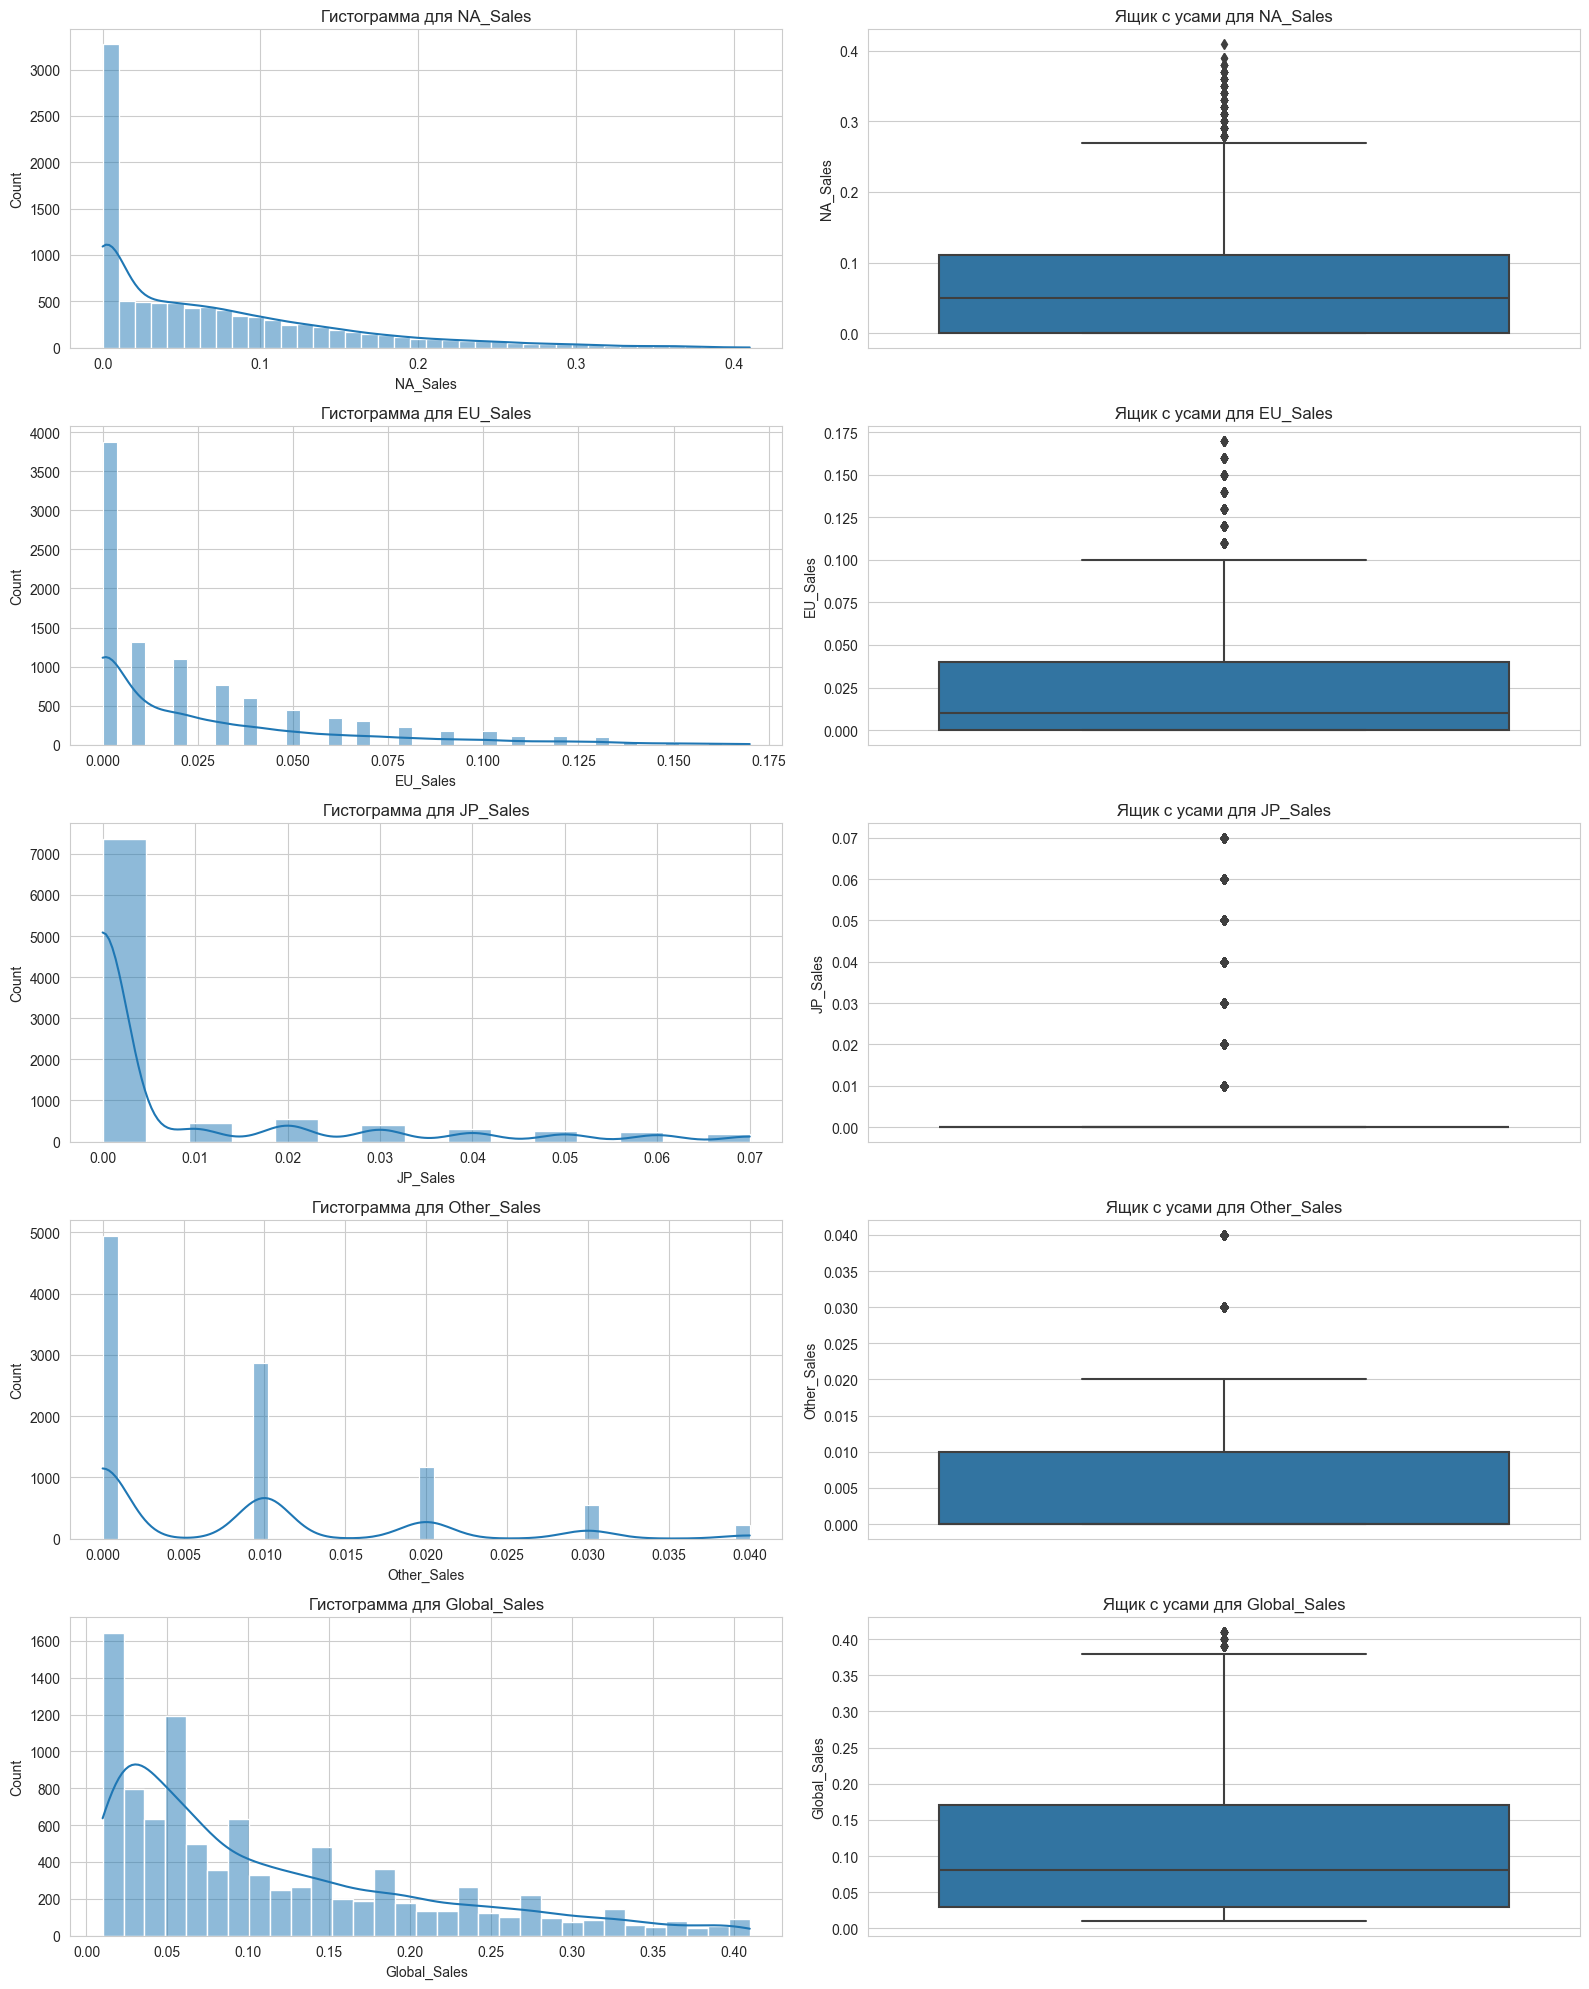

In [169]:
# Настройка размера рисунка
plt.figure(figsize=(16, 20))

# Создание графиков для каждого числового столбца
for i, col in enumerate(num_columns.columns, start=1):
    plt.subplot(len(num_columns.columns), 2, 2 * i - 1)
    sns.histplot(data=filtered_data, x=col, kde=True)
    plt.title(f'Гистограмма для {col}')

    plt.subplot(len(num_columns.columns), 2, 2 * i)
    sns.boxplot(data=filtered_data, y=col)
    plt.title(f'Ящик с усами для {col}')

plt.tight_layout()
plt.show()

### Визуализации по годам выпуска
Выпуск видеоигр по годам:
* Пик выпуска новых игр пришелся на период с 2005 по 2010 годы, после чего наблюдается стабилизация и некоторое снижение активности.

Продажи видеоигр в разбивке по годам выпуска:
* Виден рост продаж с начала 1990-х до пика в 2000-х годах, что коррелирует с общим увеличением популярности видеоигр и технологическим прогрессом.


In [170]:
# Количество видеоигр по годам
yearwisegame =  df.groupby('Year')['Name'].count().reset_index()

# Общее количество опубликованных игр за год
fig = go.Figure(go.Bar(
    x=yearwisegame['Year'],
    y=yearwisegame['Name'],
    marker={'color': yearwisegame['Name'],'colorscale': 'ice'}
))
fig.update_layout(
    title_text='Выпуск видеоигр по годам',
    xaxis_title="Год",
    yaxis_title="Количество выпущенных игр"
)
fig.show()

## Продажи видеоигр по годам

In [171]:
# Продажи видеоигр по годам
yearwisesale =  df.groupby('Year')['Global_Sales'].sum().reset_index()
# Общий объем продаж игр за год
fig = go.Figure(
    go.Bar(
        x=yearwisesale['Year'],
        y=yearwisesale['Global_Sales'],
        marker={
            'color': yearwisesale['Global_Sales'],
            'colorscale': 'ice'
        }
    )
)
fig.update_layout(
    title_text='Продажи видеоигр в разбивке по годам выпуска',
    xaxis_title="Год",
    yaxis_title="Сумма продаж"
)
fig.show()

## Рейтинг видеоигр по регионам

Топ игр по регионам:
* Северная Америка и Европа: Доминируют игры, такие как "Wii Sports" и "Grand Theft Auto V", показывая предпочтение экшн и спортивных жанров.
* Япония: Лидируют "Pokemon" и "Super Mario", что отражает культурные различия в предпочтениях игр.
* Другие регионы: Смесь жанров с некоторым преобладанием экшн-игр.

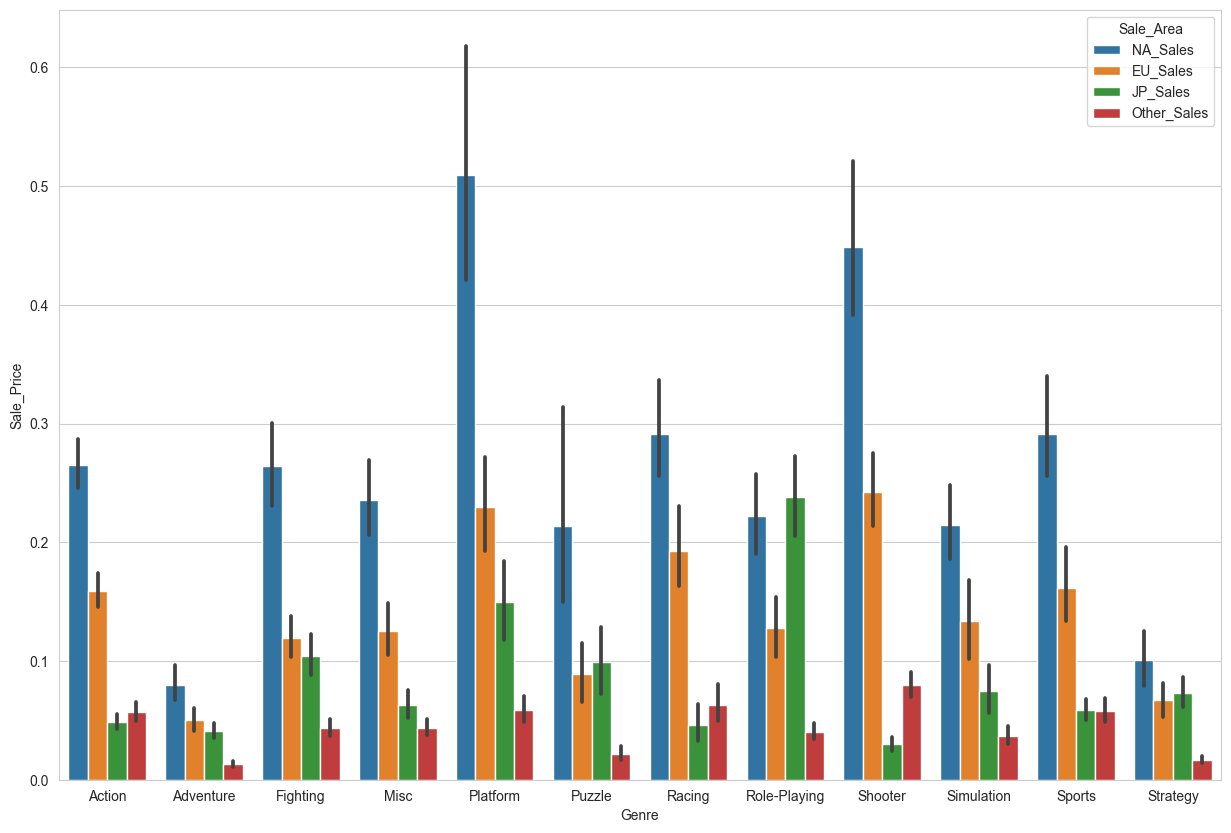

In [172]:
plt.figure(figsize=(15, 10))
comp_table = pd.melt(df, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

In [173]:
EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_games = EU.index

JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_games = JP.index

NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_games = NA.index

Other = df.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_games = Other.index

fig = make_subplots(
    rows=2, cols=2, subplot_titles=("North Americal", "Europe", "Japan","Other"),
    column_widths=[0.5, 0.5],
    row_heights=[0.5, 0.5],
)

fig.add_trace(
    go.Bar(
        y=NA['NA_Sales'],
        x=NA_games,
        name="North America",
        marker={'color': NA['NA_Sales'],'colorscale': 'Portland'}
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        y=EU['EU_Sales'],
        x=EU_games,
        name="Europe",
        marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        y=JP['JP_Sales'],
        x=JP_games,
        name="Japan",
        marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
    ),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        y=Other['Other_Sales'],
        x=Other_games,
        name="Other",
        marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
        ),
    row=2, col=2
)
fig.update_layout(height=800)
fig.show()

### Общий Объем Продаж по Регионам
Динамика продаж по регионам: Наблюдается пик продаж во всех регионах в период с 2005 по 2010 годы, что может быть связано с ростом популярности цифровых развлечений и увеличением доступности интернета. После 2010 года виден спад, вероятно, из-за насыщения рынка и изменений в потребительских предпочтениях.

In [174]:
regions_agg = {
    'NA_Sales': 'sum',
    'JP_Sales': 'sum',
    'EU_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}

geo_tdf = df.groupby(['Year']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year', ascending=True)

fig = go.Figure()
for region in  ['NA', 'JP', 'EU', 'Other']:
    fig.add_trace(go.Scatter(
        x=geo_tdf['Year'],
        y=geo_tdf[region + '_Sales'],
        mode='lines',
        name=region,
    ))
fig.update_layout(
    title="Общий объем продаж в год по регионам (в миллионах)",
    xaxis_title="Год",
    yaxis_title="Сумма продаж",
    height=600
)
fig.update_xaxes(type='category')
fig.show()

## Ящики с усами для числовых признаков


### Ящик с усами

* Продажи в Северной Америке (NA): Наблюдается широкий диапазон продаж с большим количеством выбросов, что указывает на наличие игр с очень высокими продажами. Медиана относительно низкая, что говорит о том, что большинство игр имеет умеренные продажи.
* Продажи в Европе (EU): Похожая ситуация с меньшим количеством выбросов по сравнению с Северной Америкой. Распределение более сжато, что свидетельствует о более стабильном рынке с меньшим количеством крайне успешных игр.
* Продажи в Японии (JP): Значительно меньше выбросов и очень низкая медиана, показывая, что большинство игр имеет низкие продажи, а игры с высокими продажами — редкость.
* Глобальные продажи: Аналогично продажам в Северной Америке, но с меньшим количеством выбросов. Это говорит о том, что на глобальном уровне успешные игры достигают большего распространения.

In [175]:
# Список числовых признаков для анализа
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Создание графиков
for feature in features:
    fig = px.box(filtered_data, y=feature, title=f'Box Plot of {feature}')
    fig.show()

## Столбчатые диаграммы для категориальных признаков


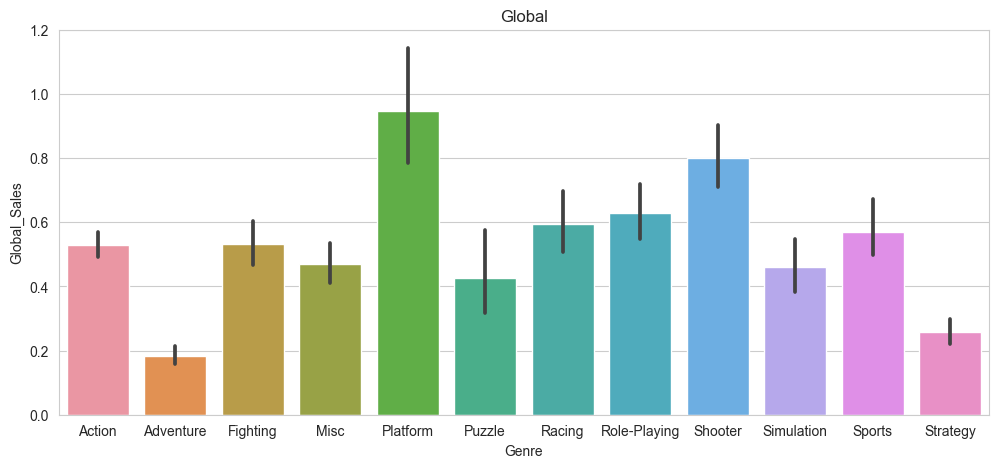

In [176]:
sns.barplot(x='Genre', y='Global_Sales', data=df)
plt.title('Global')
plt.show()

Похоже, что платформенные игры лидируют. За ними следуют стрелялки игры. Кроме того, кажется, что игры advanture - это наименее любимые игры, в которые можно играть.
Давайте посмотрим на разные части мира с помощью этой игровой жанровой функции. Это тоже будет выглядеть так?

North America to Global sale ratio:  49.11103873481186
Europe to Global sale ratio:  27.31160001679534
Japan to Global sale ratio:  14.574153112187178


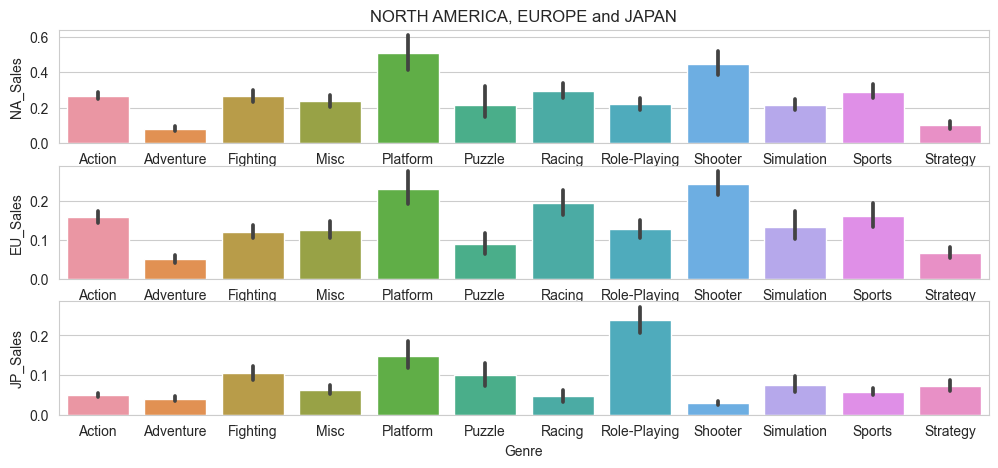

In [177]:
f, axes = plt.subplots(3, 1)
plt.rcParams["figure.figsize"] = (18, 15)
sns.barplot(x='Genre', y='NA_Sales', data=df, ax=axes[0]).set(title='NORTH AMERICA, EUROPE and JAPAN')
sns.barplot(x='Genre', y='EU_Sales', data=df, ax=axes[1])
sns.barplot(x='Genre', y='JP_Sales', data=df, ax=axes[2])
na_to_world = (df['NA_Sales'].sum()/df['Global_Sales'].sum())*100
eu_to_world = (df['EU_Sales'].sum()/df['Global_Sales'].sum())*100
jp_to_world = (df['JP_Sales'].sum()/df['Global_Sales'].sum())*100
print('North America to Global sale ratio: ', na_to_world)
print('Europe to Global sale ratio: ', eu_to_world)
print('Japan to Global sale ratio: ', jp_to_world)

Цель анализа — выявить региональные различия в популярности жанров, что может помочь разработчикам и издателям оптимизировать стратегии маркетинга и разработки игр.

Северная Америка:
* Как вы можете видеть, на Северную Америку приходится почти половина мировых продаж.
* Платформеры и спортивные игры показывают высокие продажи, что подчеркивает любовь к традиционным и динамичным играм.
* Жанры, такие как стрелялки и платформеры, также популярны, подчеркивая предпочтение активных и захватывающих игровых процессов.

Европа:
* Европейский рынок больше склонен к стрелялкам и спортивным играм, подчеркивая интерес к конкурентным и стратегически сложным жанрам.
* Относительно низкая популярность платформеров по сравнению с другими регионами может указывать на различные культурные предпочтения.

Япония:
* Ролевые игры значительно популярнее в Японии, чем в других регионах, что отражает культурную страсть к сюжетно-ориентированным и глубоко разработанным игровым мирам.
 * трелялки значительно менее популярны, что может быть связано с культурными различиями в восприятии жанра и предпочтениями в геймплее.

Региональные различия: Жанровые предпочтения значительно различаются в зависимости от региона, что подчеркивает необходимость учета культурных особенностей при разработке и продвижении игр.
Глобальные тенденции: Несмотря на региональные различия, определенные жанры, такие как спортивные и стрелялки, остаются популярными во всех регионах, что указывает на их универсальную привлекательность.

### Какая игровая платформа наиболее популярна у людей?

График глобальных продаж: PS2, X360, и PS3 лидируют по глобальным продажам, что подчеркивает их популярность и широкое принятие среди игроков. Интересно, что несмотря на технологическое преимущество новых платформ, как PS4, более старые системы, такие как PS2, всё еще демонстрируют выдающиеся результаты.


In [178]:
# Суммируем данные по платформам

import plotly.express as px

df_sorted = df.head(5000).groupby('Platform')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

# Построение графика с использованием сгруппированных данных
fig = px.bar(
    df_sorted,
    x='Platform',
    y='Global_Sales',
    title='Глобальные продажи лучших игровых платформ',
    labels={'Global_Sales': 'Global Sales (in millions)', 'Platform': 'Gaming Platform'},
    color='Platform',
    text='Global_Sales'
)
fig.show()

## Точечные диаграммы для пар числовых признаков



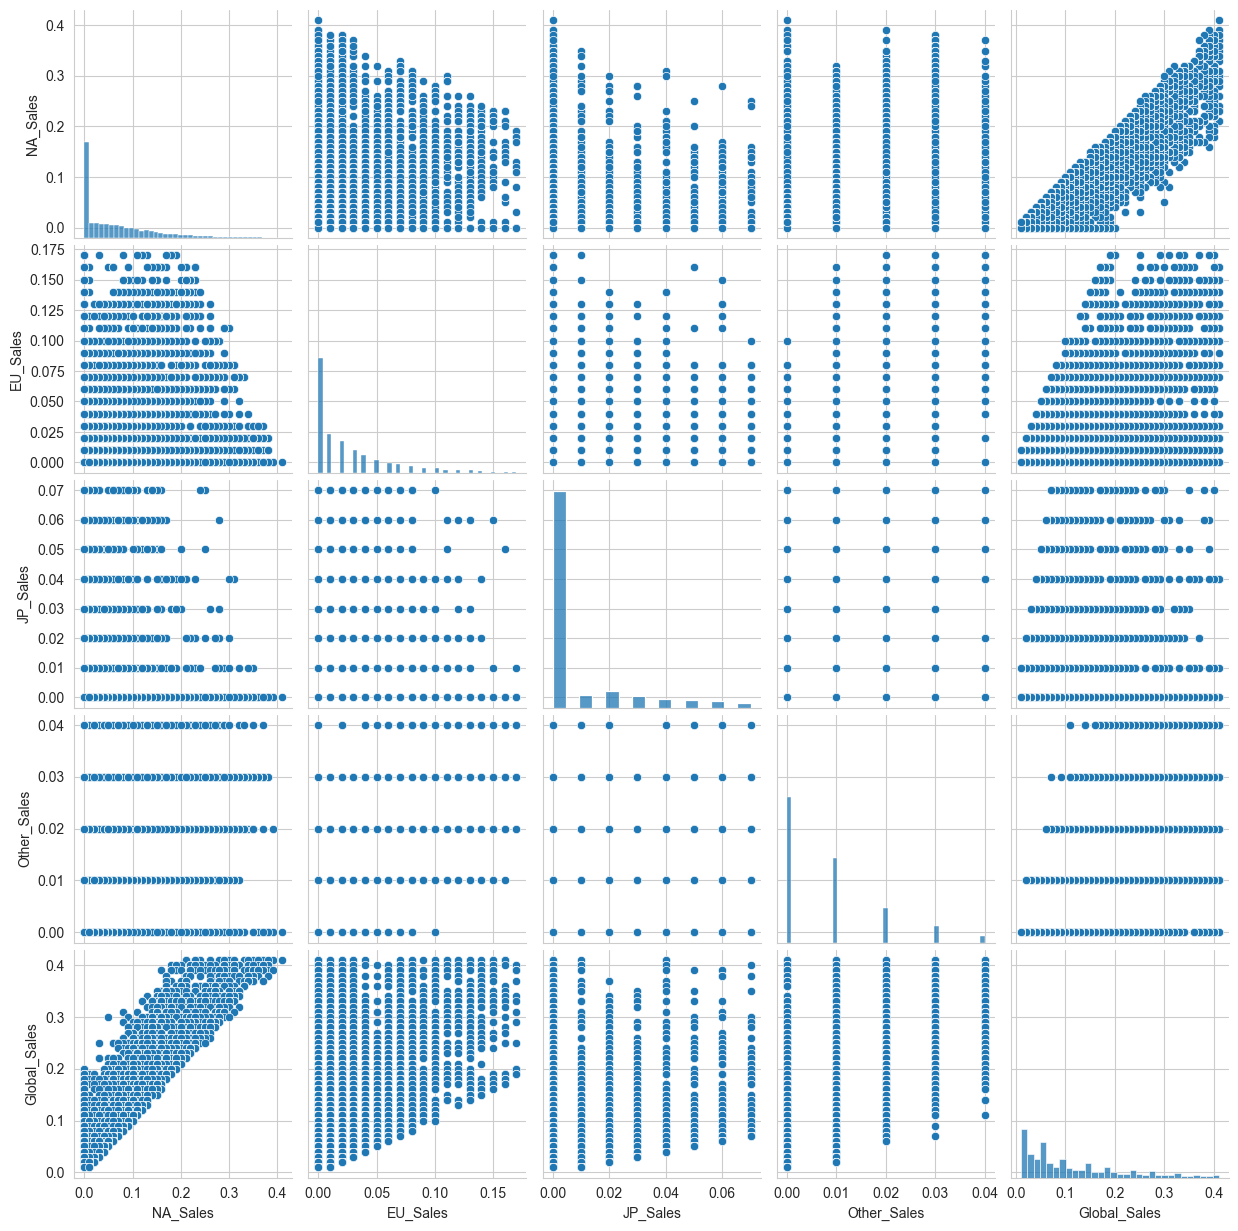

In [179]:
sns.pairplot(filtered_data, vars=num_columns)

In [180]:
# Создание pairplot
fig = px.scatter_matrix(
    filtered_data,
    dimensions=num_columns,
    color='Genre'
)

fig.update_layout(
    title='Pairplot',
    width=1200,
    height=1200
)

fig.show()

| 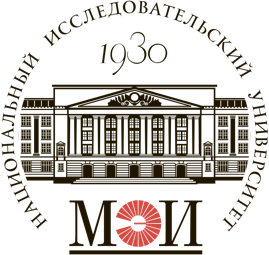 | **МИНОБРНАУКИ РОССИИ**<br><br>федеральное государственное бюджетное образовательное<br><br>учреждение высшего образования<br><br>**«Национальный исследовательский университет «МЭИ»** |
| --- | --- |

**«Интеллектуальные информационные системы»**

**Лабораторная работа №4**

**Цель:** приобретение навыков использования алгоритма линейной регрессии для анализа и прогнозирования данных.

**Задание:** решить задачу по варианту.

**Задача:**

Требуется разработать систему прогнозирования с использованием линейной регрессии на основе числовых данных на языке Python.

Шаги выполнения:

1. Выберите или создайте набор данных с числовыми значениями для применения линейной регрессии (например, данные о продажах, погоде, экономические показатели и т.д.).
2. Загрузите набор данных в Python с использованием библиотеки Pandas и проведите первичный анализ данных:

- Исследуйте структуру данных, оцените количество строк, столбцов, пропущенных значений и т.д.
- Проведите статистический анализ данных с использованием функций Pandas и NumPy.

3. Визуализируйте данные с использованием библиотек Matplotlib и Seaborn, чтобы определить возможные зависимости между переменными:

- Создайте графики распределения для каждой переменной.
- Постройте графики парной корреляции (scatterplot) и тепловую карту корреляции (heatmap) между переменными.
- Определите переменные, которые могут быть использованы для линейной регрессии.

4. Разделите данные на обучающую и тестовую выборки (например, в соотношении 80% на 20%).
5. Реализуйте модель линейной регрессии с использованием библиотеки Scikit-learn:

- Создайте и обучите модель линейной регрессии на обучающей выборке.
- Протестируйте модель на тестовой выборке и оцените качество прогнозирования с использованием метрик, таких как среднеквадратическая ошибка (RMSE), средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).

6. Визуализируйте результаты прогнозирования с использованием Matplotlib и Seaborn, сравнивая предсказанные значения с истинными значениями.
7. Подготовьте отчет о проделанной работе, включая:

- Описание выбранного набора данных и проведенного анализа данных.
- Визуализации данных, полученные на этапе исследования зависимостей между переменными.
- Описание процесса разделения данных на обучающую и тестовую выборки и выбор переменных для линейной регрессии.
- Процесс создания, обучения и тестирования модели линейной регрессии с использованием Scikit-learn.
- Результаты тестирования модели на тестовой выборке, включая метрики качества прогнозирования (RMSE, MAE, R^2) и визуализацию результатов прогнозирования.
- Выводы об эффективности использования линейной регрессии для прогнозирования данных на основе выбранного набора данных.


# Моделирование

## Выбор модели


Для анализа и прогнозирования цен на недвижимость была выбрана модель линейной регрессии. Линейная регрессия — это статистический метод, используемый для моделирования взаимосвязи между зависимой переменной и одной или несколькими независимыми переменными. Основная предпосылка модели состоит в том, что зависимая переменная можно аппроксимировать линейной функцией от независимых переменных.

## Структура модели

Формула линейной регрессии обычно представляется в виде:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon $$

где:
    $ Y $ — зависимая переменная, которую мы пытаемся предсказать (в нашем случае это Global_Sales);
    $\beta_0 $ — свободный член (интерцепт);
    $\beta_1, \beta_2, ..., \beta_n $ — коэффициенты, соответствующие влиянию каждой независимой переменной;
    $X_1, X_2, ..., X_n $ — независимые переменные, которые мы выберем для анализа;
    $\epsilon $ — ошибка модели, описывающая то, что не может быть объяснено линейной зависимостью.

## Выбор переменных
В качестве зависимых переменных рассматриваются:
* Global_Sales: продажи по всему миру.

В качестве независимых переменных рассматриваем:
* Year: год выпуска игры;
* Genre: жанр игры;
* Platform: игровая платформа.
* EU_Sales: продажи в Европе (в миллионах);
* NA_Sales: продажи в Северной Америке (в миллионах);
* JP_Sales: продажи в Японии (в миллионах);


Каждая из этих переменных имеет значительное количество уникальных значений, что позволяет подробно анализировать влияние каждого аспекта на продажи игр. Эти переменные были выбраны на основе предположения, что разные платформы, жанры и временные периоды могут оказывать различное влияние на интерес покупателей и, соответственно, на продажи.


### Преобразование категориальных переменных
#### Label Encoding

Формула кодирования конкретной категории $C$ в число может быть представлена как: $ \text{code}(C) = i $
где $i$ — порядковый номер категории $C$ в данных.


In [182]:
filtered_data.drop(['Name'], axis=1, inplace=True)

lst = ['Platform','Genre', 'Publisher']
for i in lst :
    LE = LabelEncoder()
    filtered_data[i] = LE.fit_transform(filtered_data[i])
filtered_data

Platform  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
4673         28  2007      8        493      0.36      0.02       0.0   
4676          4  2009      0         48      0.26      0.12       0.0   
4679          6  2001      1         54      0.30      0.11       0.0   
4681          6  2001      1        477      0.30      0.11       0.0   
4684         13  1998      0        127      0.41      0.00       0.0   
...         ...   ...    ...        ...       ...       ...       ...   
16593         6  2002      4        248      0.01      0.00       0.0   
16594         7  2003      8        221      0.01      0.00       0.0   
16595        16  2008      6         21      0.00      0.00       0.0   
16596         4  2010      5          8      0.00      0.01       0.0   
16597         6  2003      4        494      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
4673          0.03          0.41  
4676          0.04          0.41  
4679          0.01          0.41  
4681          0.01          0.41  
4684          0.00          0.41  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[9741 rows x 9 columns]

## Разделение данных на обучающую и тестовую выборки

Разделим данные в соотношении 80% на 20%, где 80% данных будут использоваться для обучения модели, а оставшиеся 20% - для её тестирования.

In [193]:
from sklearn.model_selection import train_test_split

# Подготовка данных для модели
X=filtered_data.drop(['Global_Sales'],axis=1)
y=filtered_data['Global_Sales']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Прогнозирование с помощью множественной линейной регрессии

In [194]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание и обучение модели
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.701e+05
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        23:09:46   Log-Likelihood:                 30296.
No. Observations:                7792   AIC:                        -6.057e+04
Df Residuals:                    7783   BIC:                        -6.051e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0350      0.024     -1.442      

In [195]:
# Прогнозирование для тренировочного набора данных
y_pred_train = results.predict(sm.add_constant(X_train))

# Оценка модели для тренировочного набора данных
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


# Вывод результатов оценки для тренировочного и тестового наборов данных
print("Для тренировочного набора данных:")
print(f"Среднеквадратическая ошибка (RMSE): {rmse_train}")
print(f"Средняя абсолютная ошибка (MAE): {mae_train}")
print(f"Коэффициент детерминации (R²): {r2_train}")

Для тренировочного набора данных:
Среднеквадратическая ошибка (RMSE): 0.004956611005013483
Средняя абсолютная ошибка (MAE): 0.0032181465973929366
Коэффициент детерминации (R²): 0.9973782752635814


In [196]:
# Прогнозирование для тестового набора данных
y_pred_test = results.predict(sm.add_constant(X_test))

# Оценка модели для тестового набора данных
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nДля тестового набора данных:")
print(f"Среднеквадратическая ошибка (RMSE): {rmse_test}")
print(f"Средняя абсолютная ошибка (MAE): {mae_test}")
print(f"Коэффициент детерминации (R²): {r2_test}")


Для тестового набора данных:
Среднеквадратическая ошибка (RMSE): 0.005002529818768112
Средняя абсолютная ошибка (MAE): 0.003269162998855857
Коэффициент детерминации (R²): 0.9974769232558216


## Анализ результатов модели линейной регрессии для прогнозирования глобальных продаж видеоигр

### Общий обзор результатов

Модель линейной регрессии, разработанная для прогнозирования глобальных продаж видеоигр, показала высокую степень объяснения изменчивости данных с коэффициентом детерминации (R²) близким к 1 (0.997) как для обучающего, так и для тестового набора данных. Это указывает на очень хорошую подгонку модели к данным.

Параметры модели:
* Коэффициенты: Значимыми предикторами оказались NA_Sales, EU_Sales, JP_Sales, и Other_Sales, каждый из которых имеет положительное влияние на глобальные продажи. Особенно важны продажи в Северной Америке и Европе, которые имеют наибольший вес в модели.
* Константа: Значение константы (интерцепт) модели близко к нулю и статистически не значимо, что указывает на низкое смещение при отсутствии продаж во всех регионах.

Статистическая значимость:
* Статистическая значимость коэффициентов: Большинство коэффициентов значимы, за исключением некоторых переменных, таких как Publisher, Platform, Year, и Genre, которые не оказывают значимого влияния на глобальные продажи в данной модели.
* Мультиколлинеарность: Высокое значение условного числа (Cond. No.) может указывать на наличие мультиколлинеарности среди предикторов, что требует дополнительного анализа.

Метрики качества модели
* Среднеквадратическая ошибка (RMSE) и средняя абсолютная ошибка (MAE) находятся на очень низком уровне как для обучающего, так и для тестового набора данных, подтверждая высокую точность предсказаний модели.
* R² для тестового набора данных также высок, что демонстрирует хорошую обобщающую способность модели.

Выводы:
* Модель линейной регрессии успешно аппроксимировала глобальные продажи видеоигр, показывая высокую точность предсказаний. Основной вклад в продажи вносят региональные продажи, в то время как другие факторы, такие как платформа, год выпуска и жанр, оказались менее значимыми. Рекомендуется провести дополнительный анализ для устранения потенциальной мультиколлинеарности и оптимизации модели.

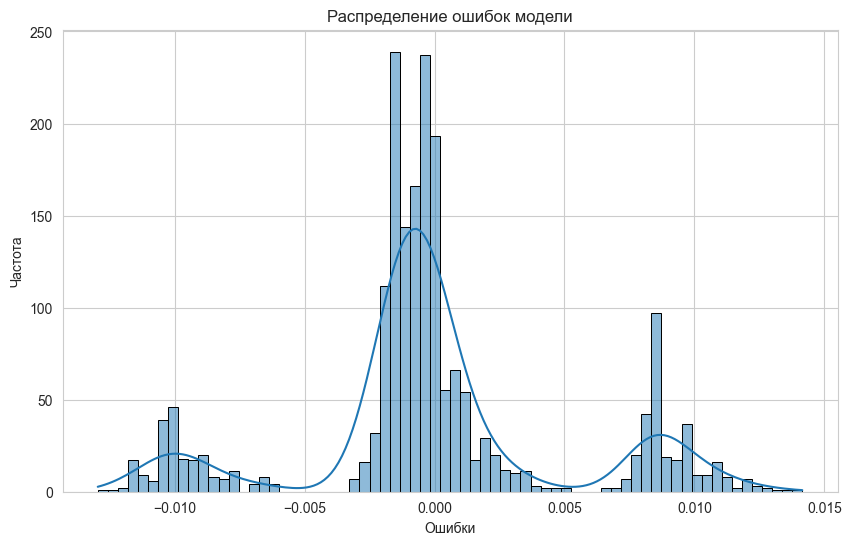

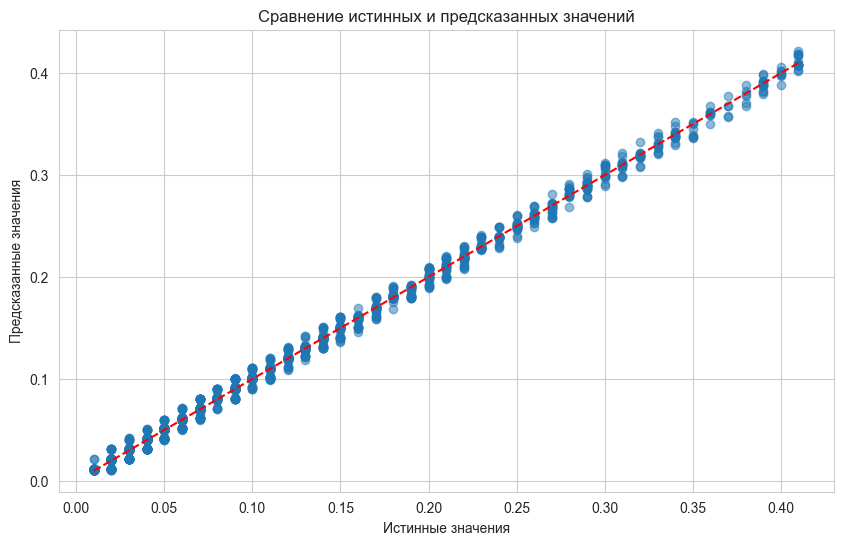

In [187]:
# Вычисление ошибок модели путем вычитания предсказанных значений из фактических
residuals = y_test - y_pred_test

# Создание гистограммы ошибок с наложенной линией плотности распределения
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, edgecolor='black')

# Заголовок графика
plt.title('Распределение ошибок модели')

# Назначение названий для осей
plt.xlabel('Ошибки')
plt.ylabel('Частота')

# Отображение сетки на графике для лучшей читаемости
plt.grid(True)

# Показать график
plt.show()

# Визуализация результатов прогнозирования для цены за единицу площади
plt.figure(figsize=(10, 6))

# Сравнение истинных и предсказанных значений
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Названия осей и заголовок
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')

plt.grid(True)
plt.show()

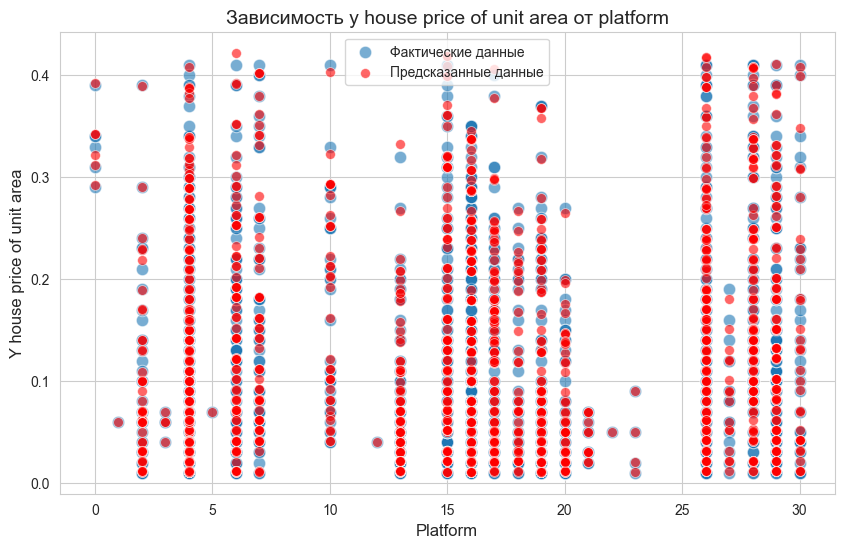

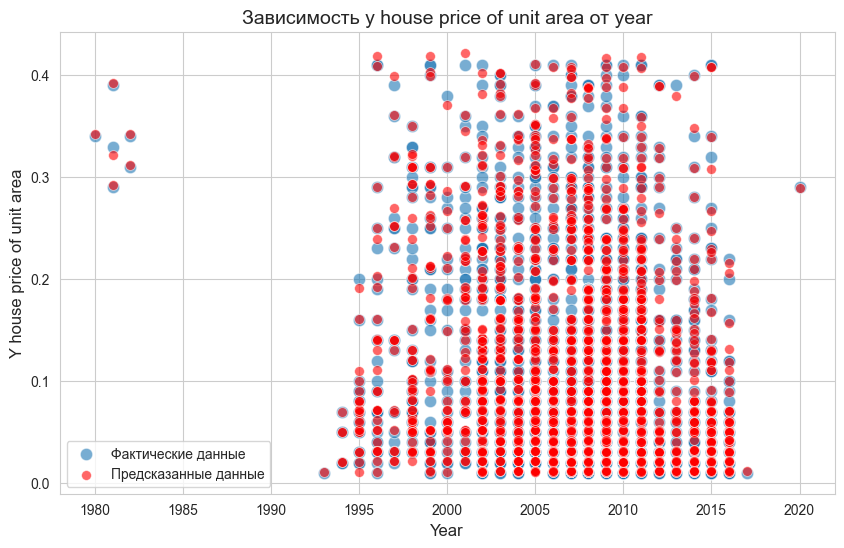

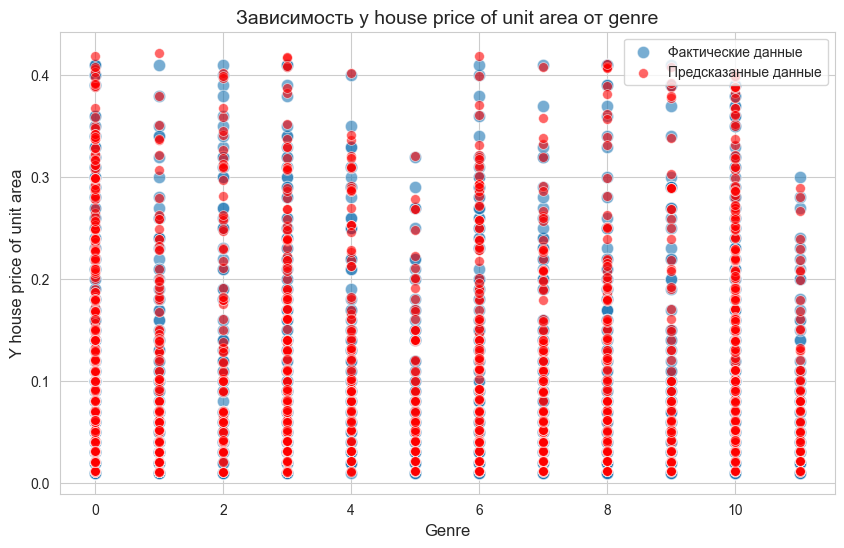

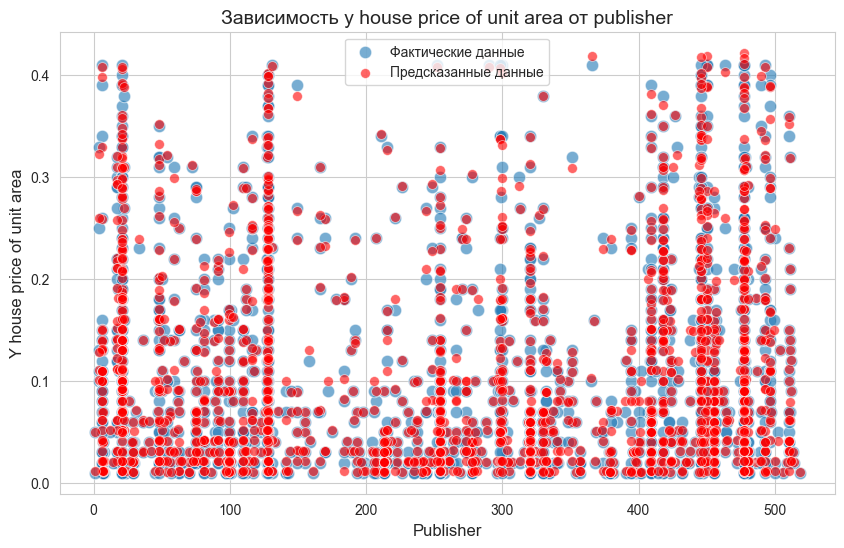

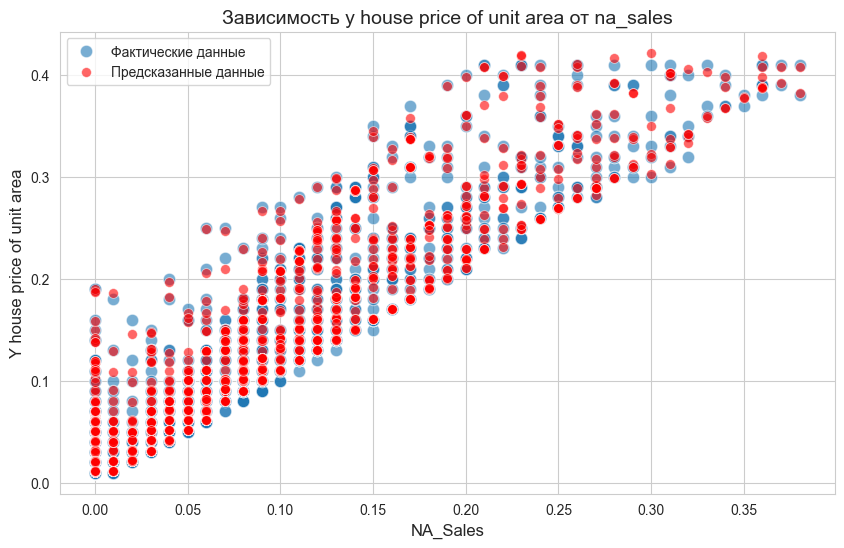

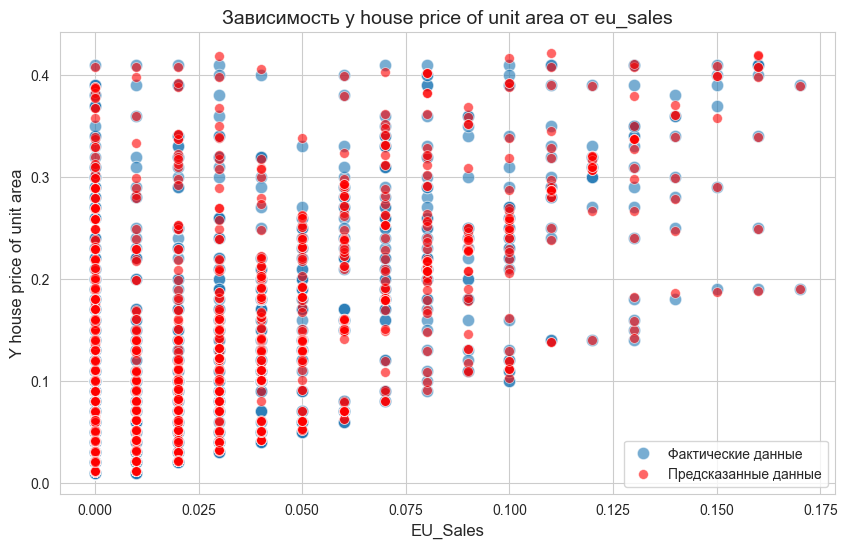

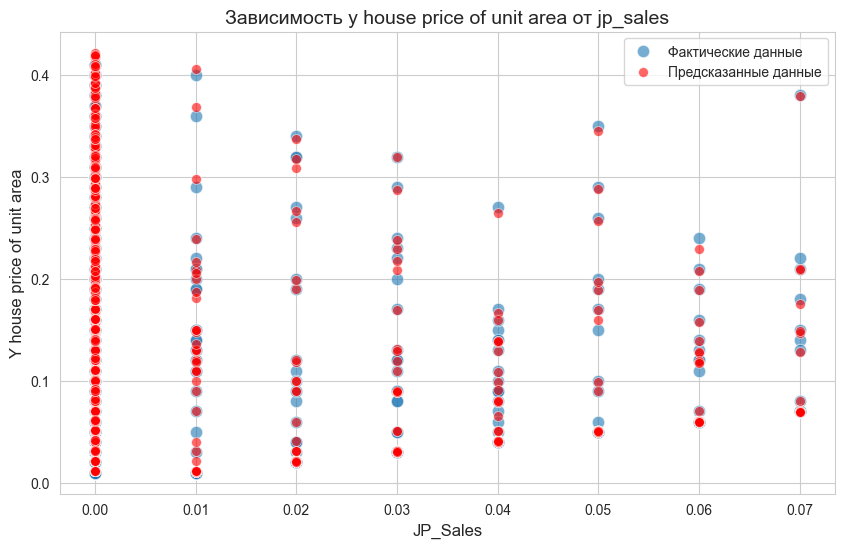

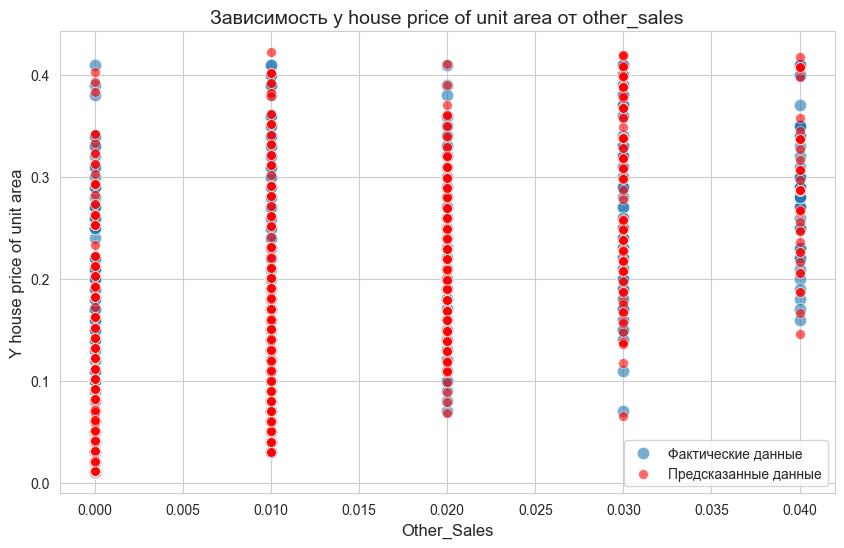

In [188]:

def plot_feature_dependencies(X, y_true, y_pred, feature, target_name='Y house price of unit area'):
    """
    Функция для отрисовки зависимости целевой переменной от признака.
    Отображает фактические и предсказанные значения.
    """
    plt.figure(figsize=(10, 6))

    # Визуализация фактических данных
    sns.scatterplot(x=X[feature], y=y_true, label='Фактические данные', alpha=0.6, edgecolor='w', s=80)

    # Визуализация предсказаний модели
    sns.scatterplot(x=X[feature], y=y_pred, label='Предсказанные данные', color='red', alpha=0.6, edgecolor='w', s=50)

    # Настройка заголовков и подписей
    plt.title(f'Зависимость {target_name.lower()} от {feature.lower()}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_name, fontsize=12)
    plt.legend()
    plt.show()

for feature in X.columns:
    plot_feature_dependencies(X_test, y_test, y_pred_test, feature)